## Step 1: Load and Understand the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ECOMM DATA.CSV')


In [2]:
# Display the first few rows of the dataframe
print(df.head())


   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891   7/31/2012   7/31/2012      Same Day    RH-19495   
1   26341    IN-2013-77878    2/5/2013    2/7/2013  Second Class    JR-16210   
2   25330    IN-2013-71249  10/17/2013  10/18/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   1/28/2013   1/30/2013   First Class    KM-16375   
4   47221     SG-2013-4320   11/5/2013   11/6/2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

In [3]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

## Step 2: Data Cleaning and Preparation

In [2]:
df.dropna(subset=['Order ID', 'Order Date', 'Product ID', 'Sales', 'Quantity'], inplace=True)

# Ensure 'Order Date' and 'Ship Date' are in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Display cleaned dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## Step 3: Compute Total Sales

In [3]:
total_sales = df['Sales'].sum()
print(f'Total Sales: ${total_sales:.2f}')

Total Sales: $12642501.91


## Step 4: Analyze Sales Trends Over Time

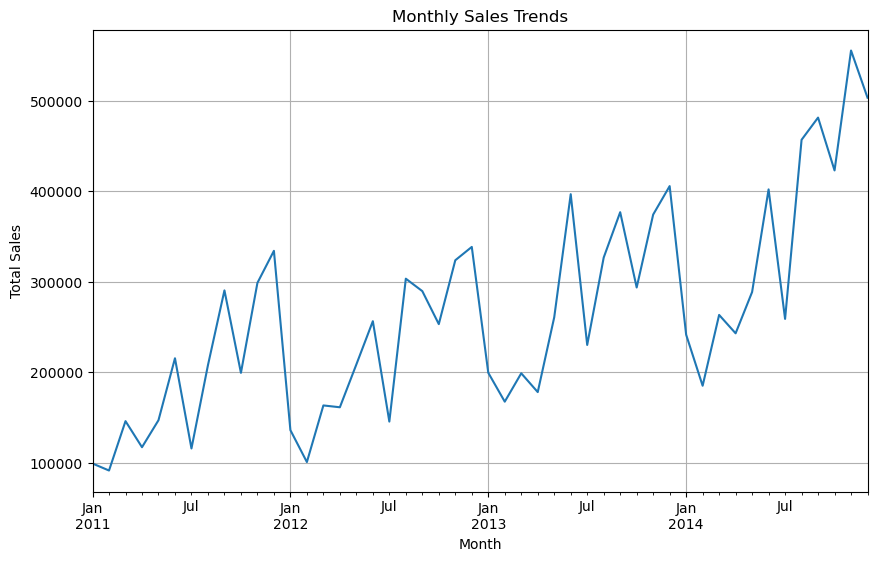

In [6]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot the sales trends over time
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Step 5: Determine Best-Selling Products

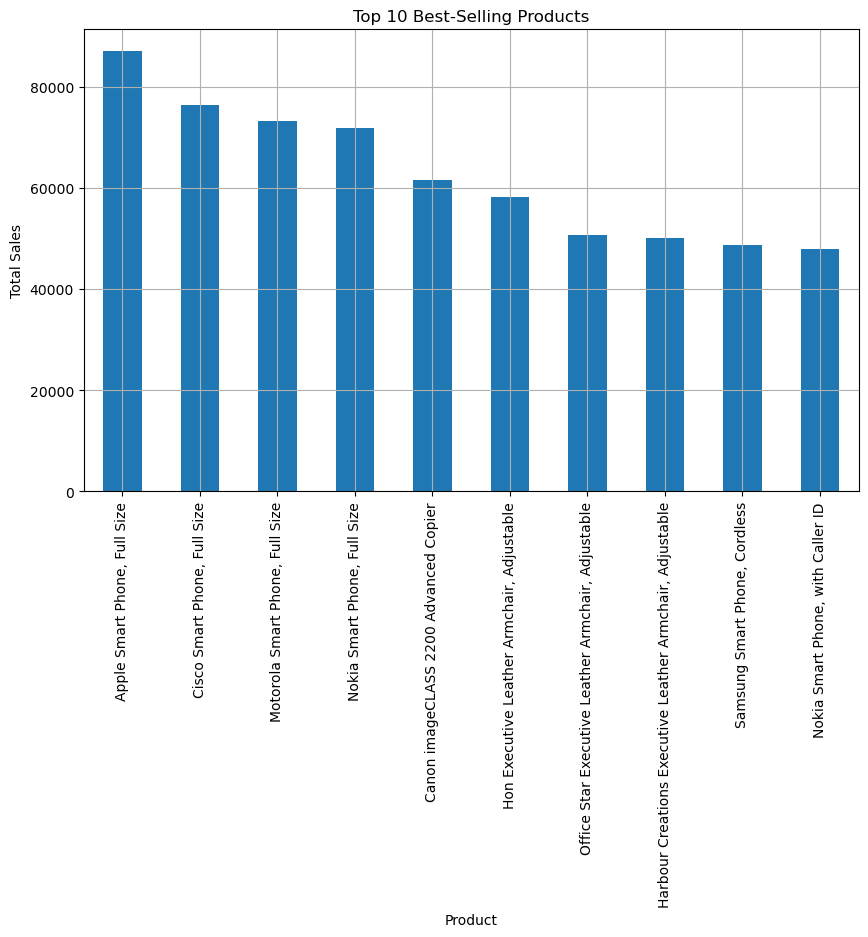

In [7]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 best-selling products
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Step 6: Additional Visualizations

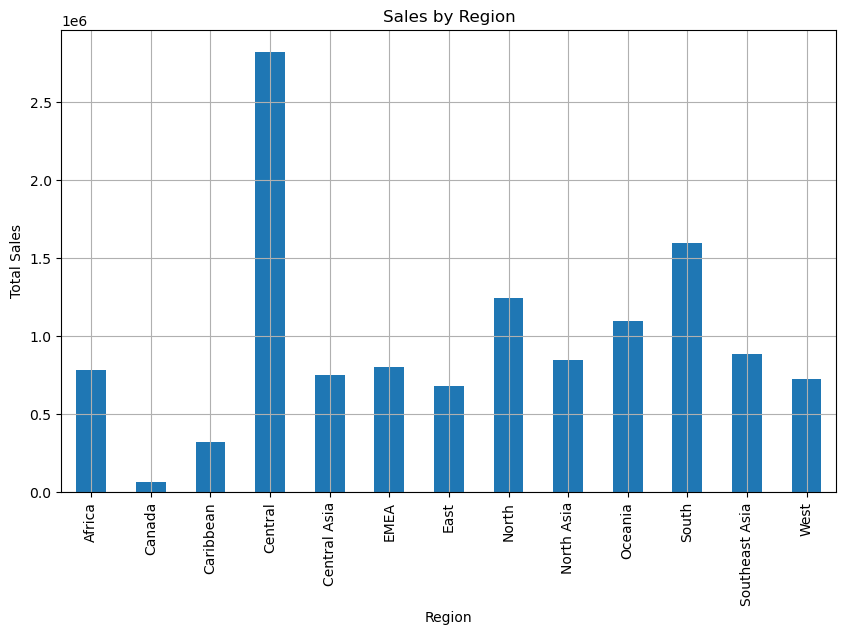

In [8]:
# Example: Sales by Region
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

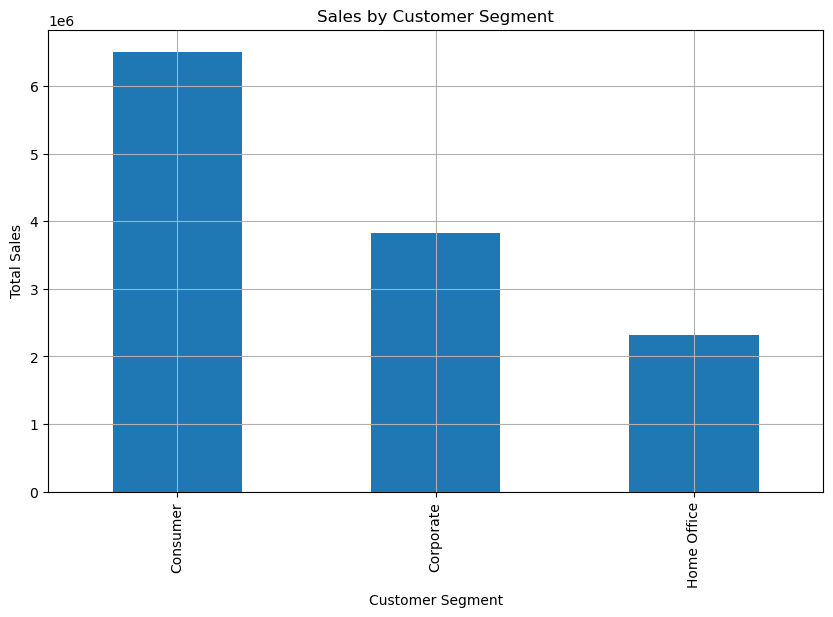

In [9]:
# Example: Sales by Customer Segment
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

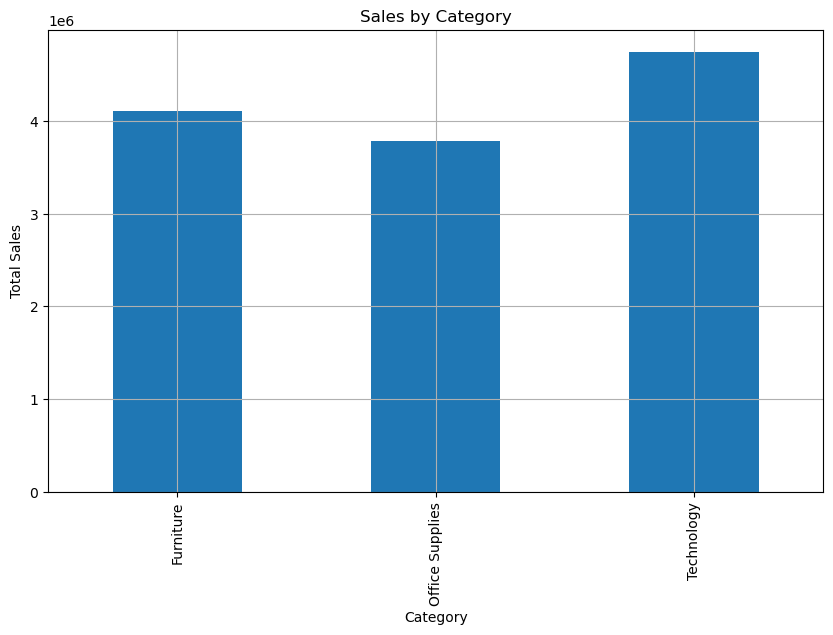

In [10]:
# Example: Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

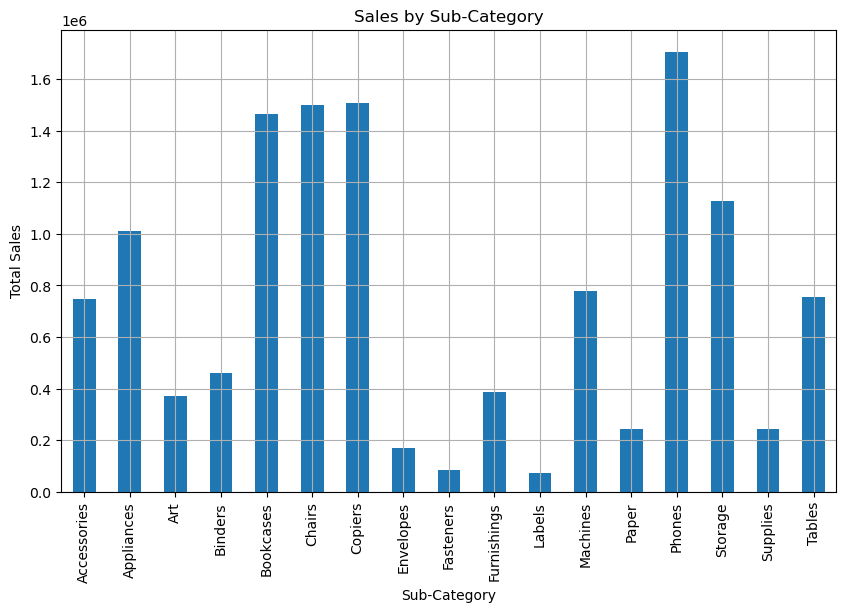

In [11]:
# Example: Sales by Sub-Category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum()
subcategory_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

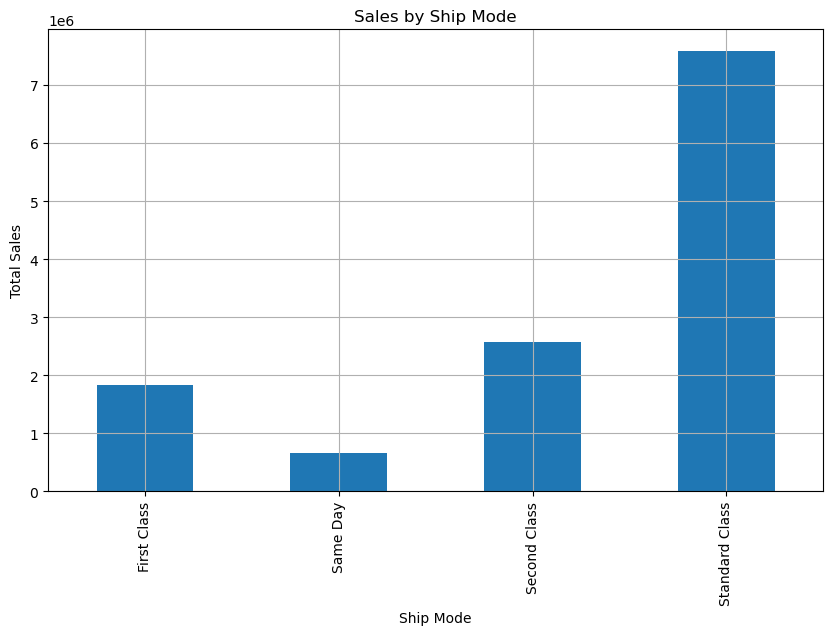

In [12]:
# Example: Sales by Ship Mode
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()
ship_mode_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

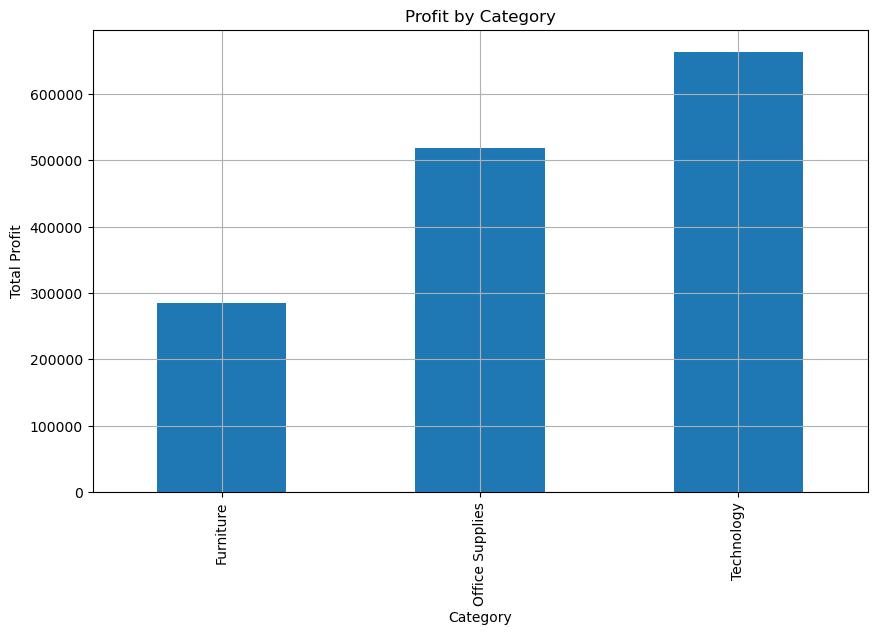

In [13]:
category_profit = df.groupby('Category')['Profit'].sum()
category_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

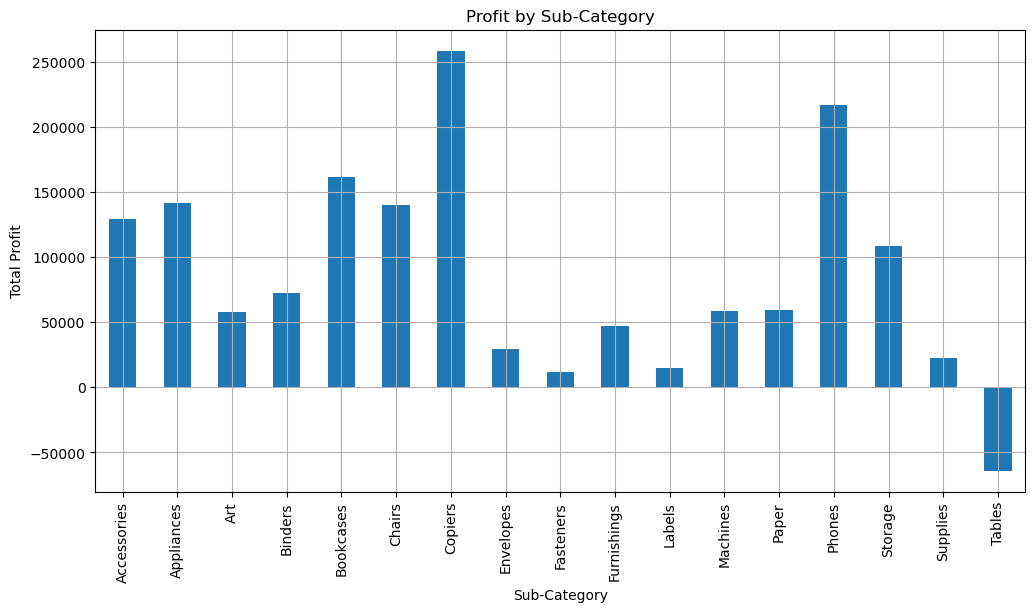

In [14]:
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum()
subcategory_profit.plot(kind='bar', figsize=(12, 6))
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

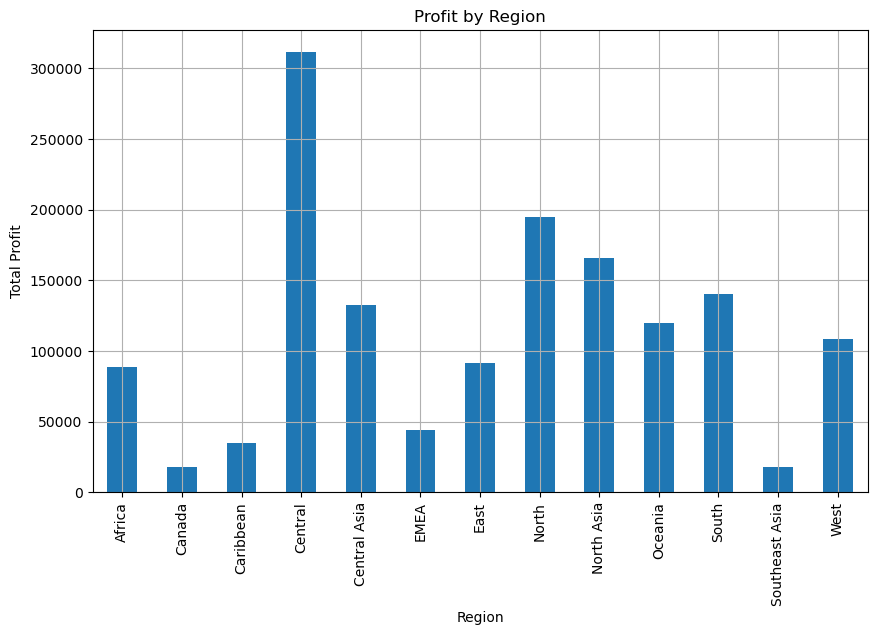

In [15]:
region_profit = df.groupby('Region')['Profit'].sum()
region_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


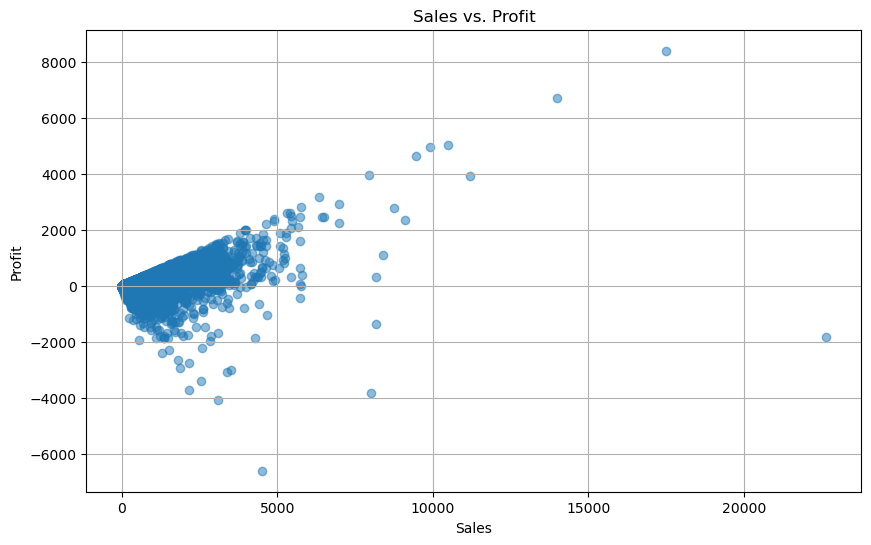

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


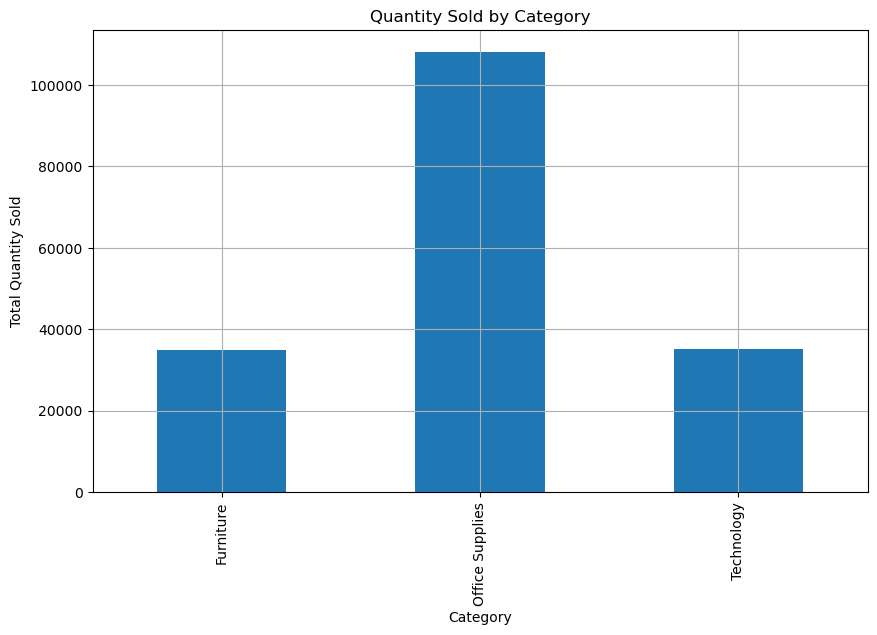

In [17]:
category_quantity = df.groupby('Category')['Quantity'].sum()
category_quantity.plot(kind='bar', figsize=(10, 6))
plt.title('Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()


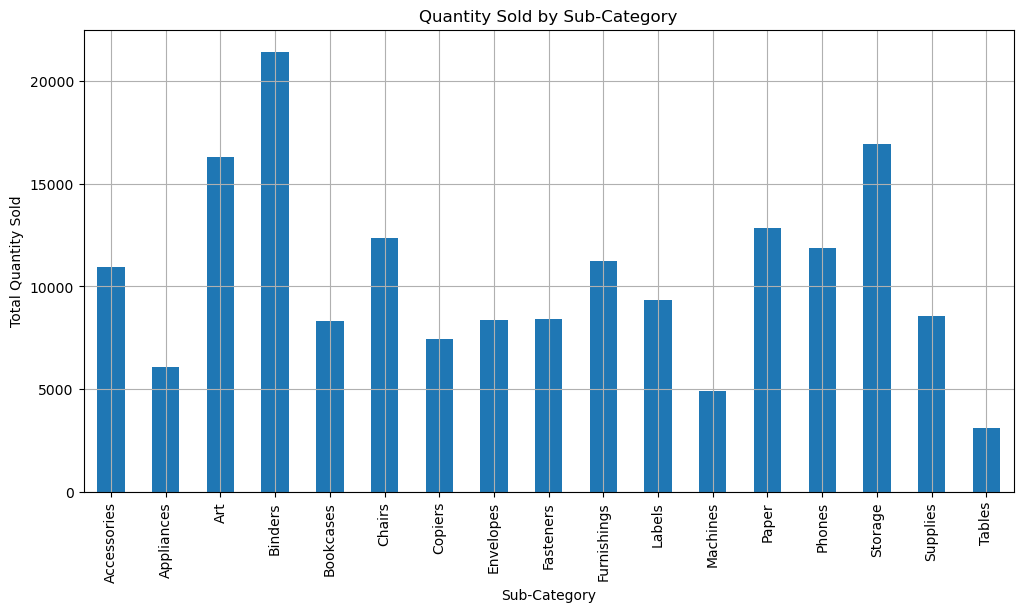

In [18]:
subcategory_quantity = df.groupby('Sub-Category')['Quantity'].sum()
subcategory_quantity.plot(kind='bar', figsize=(12, 6))
plt.title('Quantity Sold by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()


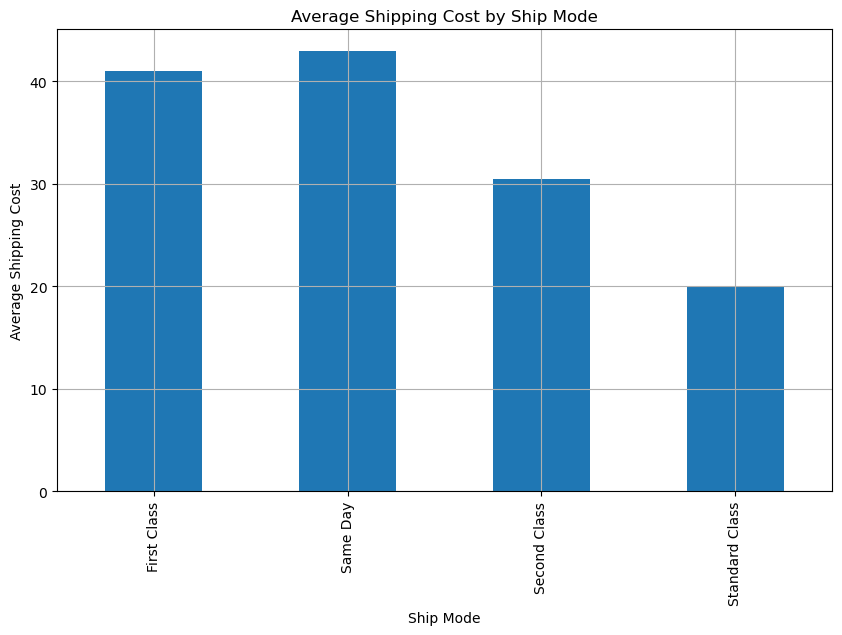

In [19]:
avg_shipping_cost = df.groupby('Ship Mode')['Shipping Cost'].mean()
avg_shipping_cost.plot(kind='bar', figsize=(10, 6))
plt.title('Average Shipping Cost by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipping Cost')
plt.grid(True)
plt.show()


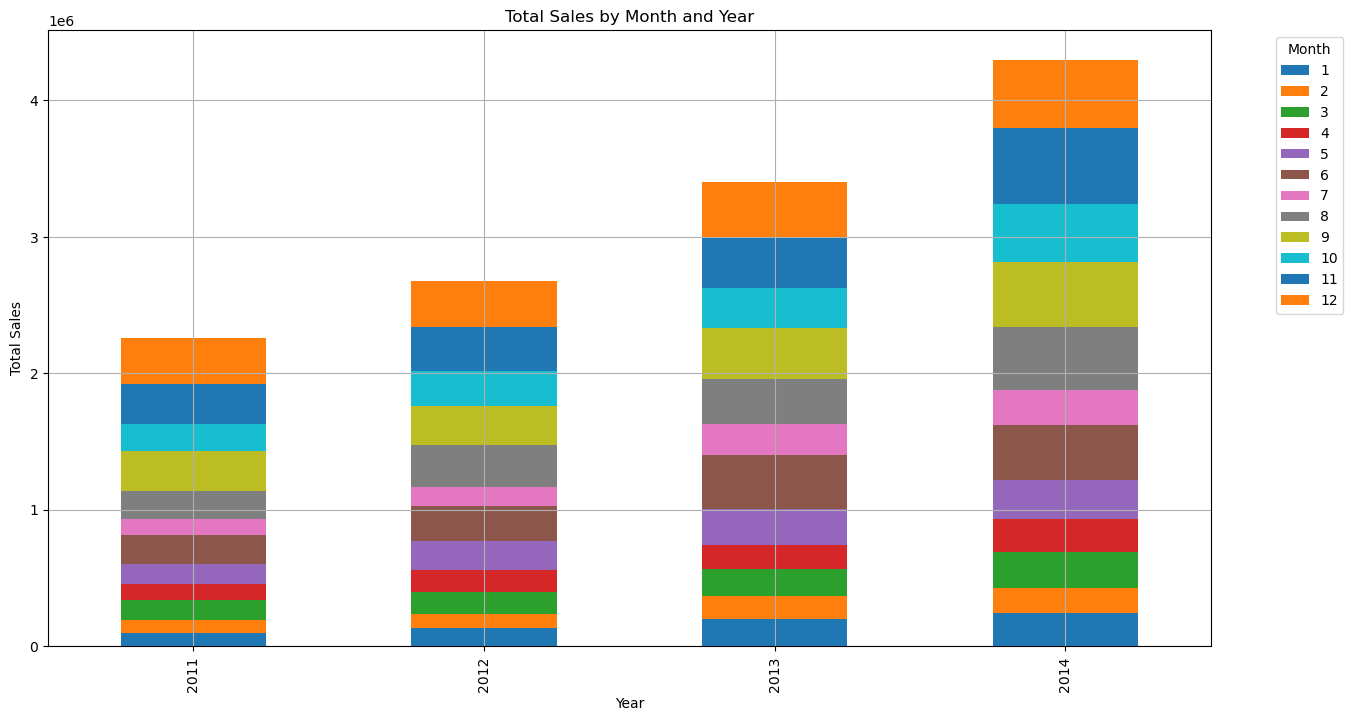

In [20]:
df['Order Year'] = df['Order Date'].dt.year
monthly_yearly_sales = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Sales'].sum().unstack()
monthly_yearly_sales.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Total Sales by Month and Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
